# Demo2 Notebook

This notebook demonstrates more advanced use of the `ModelBuilder` class. It includes the following steps:

1. Adding objects and processes schemas to the registry.
2. Connecting objects and processes.
3. Validating the model.
4. Saving the model to a file.
5. Loading a different model from a file.
6. Visualizing the model.

The `ModelBuilder` class allows for the creation and manipulation of complex models by defining objects and processes, and their interactions. This demo will guide you through the essential steps to create, validate, save, load, and visualize a model.

In [1]:
# import the ModelBuilder, ProcessCreator, and ObjectCreator classes
from multicell_utils.builder import ModelBuilder, ProcessCreator, ObjectCreator

In [2]:
# register a new object
new_object = ObjectCreator(
    type='ExtracellularMatrix',
    inherits_from='Material',
    attributes={'density': 1.0, 'stiffness': 1.0},
)
new_object.validate()
new_object.register(overwrite=True)
new_object.save(filename='ecm_object.json')

# register a new process
new_process = ProcessCreator(
    type='Collision',
    participating_objects=['ExtracellularMatrix', 'Cell'],
)
new_process.validate()
new_process.register(overwrite=True)
new_process.save(filename='collision_process.json')

Schema saved to schema/object/ecm_object.json
Schema saved to schema/process/collision_process.json


In [3]:
# build a model template that includes the new schemas
demo_model = ModelBuilder(model_name='demo')
demo_model.add_object(name='chemical field', object_type='Field')
demo_model.add_object(name='extracellular matrix', object_type='ExtracellularMatrix')
demo_model.add_process(name='collision', process_type='Collision', participating_objects=['extracellular matrix'])

In [4]:
# validate and save
demo_model.validate()
demo_model.save('demo_model2.json')

Model saved to models/demo_model2.json


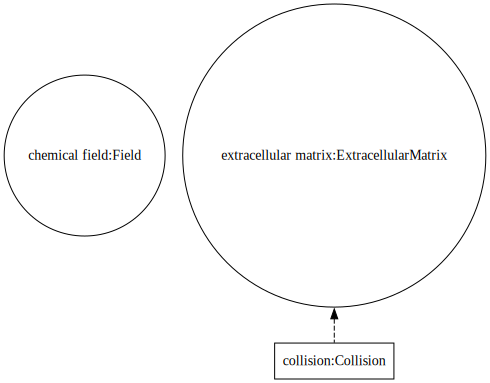

In [5]:
# display the model as a graph
demo_model.graph()

## Load model from file
Here we load a different model from a file and modify it.

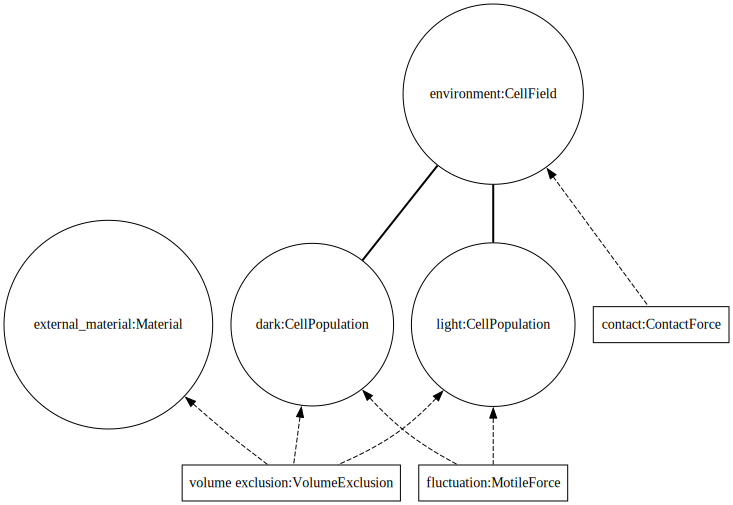

In [6]:
# load a model from file and graph
demo2 = ModelBuilder(model_file='cell_sorting.json')
demo2.graph()

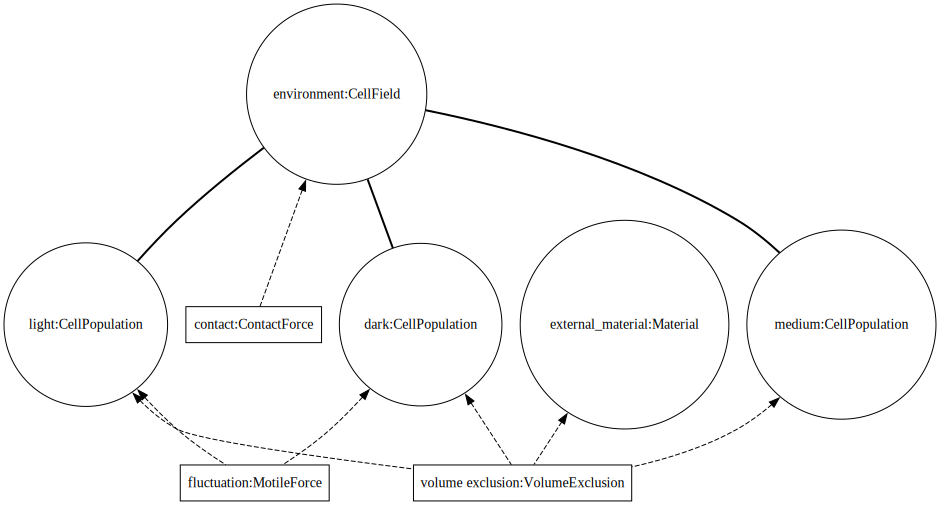

In [8]:
# add a new object and connect it to an existing process
demo2.add_object(name='medium', object_type='CellPopulation')
demo2.add_object(name='environment', object_type='CellField', contained_objects=["dark", "medium", "light"])
demo2.add_process(name='volume exclusion', process_type='VolumeExclusion',
                    participating_objects=["dark", "medium", "light", "external_material"])
demo2.validate()
demo2.graph()